# **Pytorch Tensors & Autograd**
Author: **Sebastien Quetin**
## Why do we need Tensors and Autograd in Deep Learning?

## What is a tensor ? 
*   Tensor definition
*   Difference between tensors and classical numpy arrays


---


---



## What is Autograd ? 

*   What does it do? 
*   How do we make use of it?  
*   Why is it so powerful?


Please **copy this notebook** on your own drive before running it!
Also, this google colab needs to have GPU accelerator available. You can go to Edit -> Notebook settings and select GPU as hardware accelerator.

Installing torchviz since it is not installed by default like torch.

In [ ]:
!pip install torchviz 

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Created wheel for torchviz: filename=torchviz-0.0.2-py3-none-any.whl size=4150 sha256=f70ddd2607e62d91c0530c1cce0cd465e93aa481f7aec848b686f2305d583fa9
  Stored in directory: /root/.cache/pip/wheels/04/38/f5/dc4f85c3909051823df49901e72015d2d750bd26b086480ec2
Successfully built torchviz


## Tensors

### What is a Tensor? 

[Torch definition](https://pytorch.org/docs/stable/tensors.html): A torch.Tensor is a multi-dimensional matrix containing elements of a **single** data type. \

[Tensorflow definition](https://www.tensorflow.org/api_docs/python/tf/Tensor): A tf.Tensor represents a multidimensional array of elements.


A tensor (tensorflow or pytorch) can be assimilated to an enhanced version of a Numpy array. The two main things tensors have that numpy arrays don't are :

*   Graph  
*   Device

Graphs will keep track of all the composed functions for derivatives/gradients computations and devices can be manually set by the programmer to accelerate his/her Deep Learning training.



In [ ]:
import torch 
import numpy as np
print(torch.__version__)

1.11.0+cu113


You can create a tensor for a list or list of lists. 

In [ ]:
x = torch.tensor([[1., -1.], [1., -1.]])
print(x)

tensor([[ 1., -1.],
        [ 1., -1.]])


You can create a Tensor from a Numpy array. 

In [ ]:
x= torch.tensor(np.array([[1, 2, 3], [4, 5, 6]]))
print(x)


tensor([[1, 2, 3],
        [4, 5, 6]])


In [ ]:
print("The object x is of type : ",type(x))
print("Its type on the CPU is : ",x.type())
print("On the GPU in general you would just add the cuda keyword, it would be : ",x.type().split('.')[0]+'.cuda.'+x.type().split('.')[1])
print("It contains elemnts of type : ",x.dtype)

The object x is of type :  <class 'torch.Tensor'>
Its type on the CPU is :  torch.LongTensor
On the GPU in general you would just add the cuda keyword, it would be :  torch.cuda.LongTensor
It contains elemnts of type :  torch.int64


You can create torch tensor of numerical types like signed, unsigned integer, float, of any precision, complex numbers and boolean. You can not create a tensor of strings. You can see the available datatypes [here](https://pytorch.org/docs/stable/tensors.html)

You can specify its type. If not specified, it reads the type of the input and builds a 64 digits precision version of it : 

In [ ]:
x = torch.tensor([[1, 2, 3], [4, 5, 6]], dtype=float)
print(x)

tensor([[1., 2., 3.],
        [4., 5., 6.]], dtype=torch.float64)


You can also get a specific index of your tensors like for arrays and it is still going to be a tensor.

In [ ]:
x = torch.tensor([[1, 2, 3], [4, 5, 6]], dtype=torch.float32)
print(x[1][2])

print(x[1][2].dtype)

tensor(6.)
torch.float32


### Common torch functions

There is a strong link with numpy. You can transfer very easily between these two libraries.

In [ ]:
numpy_x = x.numpy()
print("Here is my numpy array : ", numpy_x, " of type " , type(numpy_x))
print("=====================================")
npy_array = np.array([[2,89],[66,13]])
tsr = torch.from_numpy(npy_array)
print("Here is my tensor created from a numpy object : ", tsr)

Here is my numpy array :  [[1. 2. 3.]
 [4. 5. 6.]]  of type  <class 'numpy.ndarray'>
Here is my tensor created from a numpy object :  tensor([[ 2, 89],
        [66, 13]])


In [ ]:
print("max value of the tensor : ", x.max())
print("min value of the tensor : ", x.min())
print("mean value of the tensor : ", x.mean())
print("standard deviation value of the tensor : ", x.std())
print("Sum of the values of the tensor : ", x.sum())

max value of the tensor :  tensor(6.)
min value of the tensor :  tensor(1.)
mean value of the tensor :  tensor(3.5000)
standard deviation value of the tensor :  tensor(1.8708)
Sum of the values of the tensor :  tensor(21.)


In [ ]:
x + 1

tensor([[2., 3., 4.],
        [5., 6., 7.]])

In [ ]:
x.add(1) # do not change the value pof x compared to x.add_(1) which is an inplace operation

tensor([[2., 3., 4.],
        [5., 6., 7.]])

In [ ]:
x/6

tensor([[0.1667, 0.3333, 0.5000],
        [0.6667, 0.8333, 1.0000]])

In [ ]:
torch.div(x,6)

tensor([[0.1667, 0.3333, 0.5000],
        [0.6667, 0.8333, 1.0000]])

It is equivalent to true division in Python (the / operator) and NumPy’s np.true_divide, we can check that the python true division gives the same results : 

In [ ]:
torch.div(x,6) == x/6

tensor([[True, True, True],
        [True, True, True]])

The == sign will do an element-wise comparison, same as [torch.eq](https://pytorch.org/docs/stable/generated/torch.eq.html?highlight=eq#torch.eq) . You can find all the comparison operators [here](https://pytorch.org/docs/stable/torch.html#comparison-ops)

In [ ]:
torch.eq(torch.div(x,6), x/6)

tensor([[True, True, True],
        [True, True, True]])

We can also directly compare the tensors with [torch.equal](https://pytorch.org/docs/stable/generated/torch.equal.html?highlight=equal#torch.equal)

In [ ]:
torch.equal(torch.div(x,6), x/6)

True

In [ ]:
print(x.size())
print(x.shape)

torch.Size([2, 3])
torch.Size([2, 3])


If you look at the [description](https://pytorch.org/docs/stable/generated/torch.div.html#torch.div) of the div function you can see that it supports broadcasting to a common shape, type promotion, and integer, float, and complex inputs.  

In [ ]:
print("Torch will match the dimensions of the operands for the division")
print(x / torch.tensor([[1],[2]]))
print("================================")
print(x / torch.tensor([[1,2,3]]))


Torch will match the dimensions of the operands for the division
tensor([[1.0000, 2.0000, 3.0000],
        [2.0000, 2.5000, 3.0000]])
tensor([[1.0000, 1.0000, 1.0000],
        [4.0000, 2.5000, 2.0000]])


In [ ]:
print("You can flatten as with numpy : ", x.flatten())
print("================================")
print("Reshape as with numpy : ", x.reshape((-1,2)))
print("================================")
print("Create similar object as with numpy : ")
print("With zeros : ", torch.zeros_like(x))
print("Random numbers : ",torch.randn_like(x))

You can flatten as with numpy :  tensor([1., 2., 3., 4., 5., 6.])
Reshape as with numpy :  tensor([[1., 2.],
        [3., 4.],
        [5., 6.]])
Create similar object as with numpy : 
With zeros :  tensor([[0., 0., 0.],
        [0., 0., 0.]])
Random numbers :  tensor([[ 0.8267,  0.6344, -1.1585],
        [-0.0357,  1.0337,  0.5032]])


In [ ]:
w = torch.randn(2, 3)
print(w)
print("=========================")
print(w.transpose(0,1)) # you need to pass the dimensions to be transposed because tensors can have more than 2 dimensions!
print("=========================")
print(w.T) 

tensor([[ 1.3013,  0.1544,  0.0739],
        [-0.5824, -0.6963,  0.0079]])
tensor([[ 1.3013, -0.5824],
        [ 0.1544, -0.6963],
        [ 0.0739,  0.0079]])
tensor([[ 1.3013, -0.5824],
        [ 0.1544, -0.6963],
        [ 0.0739,  0.0079]])


In [ ]:
y1 = x @ x.T 
print("Matrix multiplication " ,y1)
print("================================")
y2 = x.matmul(x.T) 
print("Matrix multiplication " , y2)
print("================================")
y3 = x * x 
print("Element wize multiplication ", y3)
print("================================")
y4 = x * 10 
print("Element wize multiplication ", y4)

Matrix multiplication  tensor([[14., 32.],
        [32., 77.]])
Matrix multiplication  tensor([[14., 32.],
        [32., 77.]])
Element wize multiplication  tensor([[ 1.,  4.,  9.],
        [16., 25., 36.]])
Element wize multiplication  tensor([[10., 20., 30.],
        [40., 50., 60.]])


In [ ]:
y = torch.pow(x,2)
print("Element wise power operation", y)
y = torch.pow(x,4)
print("Element wise power operation", y)

Element wise power operation tensor([[ 1.,  4.,  9.],
        [16., 25., 36.]])
Element wise power operation tensor([[1.0000e+00, 1.6000e+01, 8.1000e+01],
        [2.5600e+02, 6.2500e+02, 1.2960e+03]])


In [ ]:
print("It can broadcast for any operation " , torch.add(x, torch.tensor([[5,10,15]]))) # same as with x + torch.tensor()
print("Or adding element wise " , torch.add(x, torch.tensor([5]))) # same as with x + torch.tensor()

It can broadcast for any operation  tensor([[ 6., 12., 18.],
        [ 9., 15., 21.]])
Or adding element wise  tensor([[ 6.,  7.,  8.],
        [ 9., 10., 11.]])


Copying tensors with clone

In [ ]:
y = x

In [ ]:
x.clone()

tensor([[1., 2., 3.],
        [4., 5., 6.]])

[view](https://pytorch.org/docs/stable/generated/torch.Tensor.view.html?highlight=view#torch.Tensor.view) can be used to copy a tensor data but with different shape or data type (be careful with the data type casting of view! If you want to cast use .to() instead)

In [ ]:
y = x.view(3,2)
y


tensor([[1., 2.],
        [3., 4.],
        [5., 6.]])

In [ ]:
x.to(torch.int32)

tensor([[1, 2, 3],
        [4, 5, 6]], dtype=torch.int32)

In [ ]:
z = torch.tensor([[58,59,60],[7,7,7]])
torch.stack([x,z])

tensor([[[ 1.,  2.,  3.],
         [ 4.,  5.,  6.]],

        [[58., 59., 60.],
         [ 7.,  7.,  7.]]])

###  Managing device 

Why would we need other devices for our python programs ? Deep Learning computations can be accelerated with the use of GPUs (Graphics Proces Units). Generally CUDA-capable GPUs will provide a speed gain in computations. You might not see a very big difference over a single computation but as Neural Network training are done with loops, the speed gain will quickly get huge. 

**What is CUDA ?**  \
CUDA® is a parallel computing platform and programming model that enables dramatic increases in computing performance by harnessing the power of the graphics processing unit (GPU). See this link for more [resources on CUDA](https://developer.nvidia.com/cuda-faq)

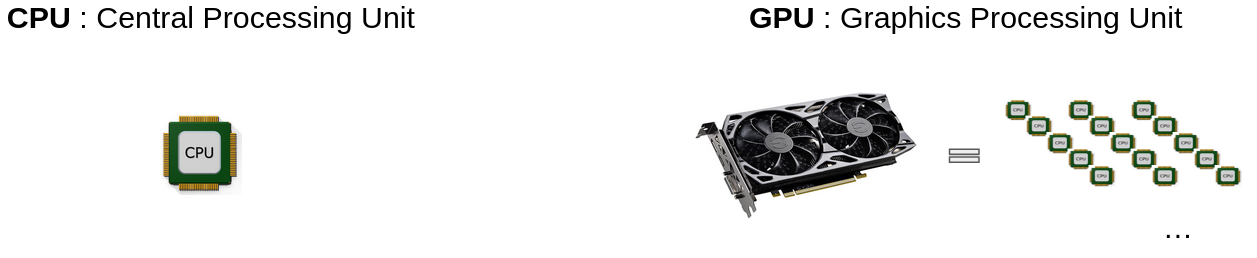

Other hardware accelerators can be used like [TPUs](https://cloud.google.com/tpu/docs/tpus?hl=en) but I will only cover the most common accelerators that are CUDA GPUs.

To make your code work with CPU or GPU you can just have a .to(device) call on every tensor you use for your computations and set device value at the beginning of your script.

In [ ]:
IhaveGPU = torch.cuda.is_available()
if IhaveGPU:
  print("We are using a GPU in this notebook.")
  device = "cuda"
else : 
  print("We are running this notebook with a CPU.")
  device = "cpu"

#device = torch.device("cuda" if torch.cuda.is_available() else "cpu") # one line version

We are using a GPU in this notebook.


In [ ]:
!nvidia-smi

Wed Jun 29 15:05:24 2022       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 460.32.03    Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   37C    P8    10W /  70W |      3MiB / 15109MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [ ]:
tsr = torch.ones([2, 4], dtype=torch.float64, device=device)
print("My tensor is located in " , tsr.device)

My tensor is located in  cuda:0


In [ ]:
if IhaveGPU : 
  cuda0 = torch.device('cuda:0')
  tsr_gpu = torch.ones([2, 4], dtype=torch.float64, device=cuda0)
  tsr_cpu = torch.ones([2, 4], dtype=torch.float64, device="cpu")
  print("I am summing two tensors from different devices")
  res = tsr_gpu + tsr_cpu
  print("The result is going to be stored in ", res.device)


I am summing two tensors from different devices


RuntimeError: ignored

Learn more about tensors operations on different devices on this forum [discussion](https://discuss.pytorch.org/t/can-tensors-on-different-devices-add-together/146221).

When moving a tensor between device, as explained [here](https://discuss.pytorch.org/t/moving-tensor-to-cuda/39318) nn.modules don't need reassignment but tensors do.

In [ ]:
tsr.cpu() # is equivalent to tsr.to("cpu")
tsr.device

device(type='cuda', index=0)

In [ ]:
tsr = tsr.cpu() # is equivalent to tsr.to("cpu")
print(tsr.device)
if IhaveGPU :
  tsr = tsr.cuda() # is equivalent to tsr.to("cuda0")
  print(tsr.device)

cpu
cuda:0


Use torch.Tensor.item() to get a Python number from a tensor containing a single value. Warning : it moves the data to the cpu.

In [ ]:
tsr[1,3].item()

1.0

In Pytorch [CUDA documentation](https://pytorch.org/docs/stable/notes/cuda.html) it is explained that, *PyTorch automatically performs necessary synchronization when copying data between CPU and GPU or between two GPUs. Hence, computation will proceed as if every operation was executed synchronously.* So one should be aware when transferring data to other device with .item(), .cpu().

When timing you training loops, you should  synchronize before and after your loop and before stopping time.

[Example](https://colab.research.google.com/notebooks/gpu.ipynb) of how to use GPU on google colab and small demo of a GPU training speed improvment.

If you look at the [Pytorch documentation](https://pytorch.org/docs/stable/generated/torch.tensor.html#torch.tensor) you will see that there are four arguments : dtype, device, requires_grad and pin_memory. 

*   dtype : see above
*   device: see below
*   requires_grad : see Autograd part 
*   pin memory avoids an implicit CPU to CPU copy of the tensors and allows for a faster transfer to GPU. As explained in [NVIDIA documentation](https://developer.nvidia.com/blog/how-optimize-data-transfers-cuda-cc/) *GPUs* cannot access CPU data from the paged memory.




Pytorch [dataloader class](https://pytorch.org/docs/stable/data.html?highlight=dataloader#torch.utils.data.DataLoader) implements this memory pinning process.

## Autograd 



A [tensor](https://pytorch.org/docs/stable/generated/torch.tensor.html#torch.tensor) can be created with requires_grad=True so that torch.autograd records operations on them for automatic differentiation.

### What is Autograd ?

[torch.autograd](https://pytorch.org/docs/stable/autograd.html) provides classes and functions implementing automatic differentiation of arbitrary scalar valued functions. It requires minimal changes to the existing code - you only need to declare Tensor s for which gradients should be computed with the requires_grad=True keyword. As of now, we only support autograd for floating point Tensor types ( half, float, double and bfloat16) and complex Tensor types (cfloat, cdouble).

You can still use it but and you will probably find some piece of codes using it but the class [Variable](https://pytorch.org/docs/stable/autograd.html#variable-deprecated) is deprecated. Please use torch.tensor instead.



In [ ]:
from torch.autograd import Variable

x = Variable(torch.ones(3, 4), requires_grad=True)
print(x)

tensor([[1., 1., 1., 1.],
        [1., 1., 1., 1.],
        [1., 1., 1., 1.]], requires_grad=True)


Now all parameters in the model, except the parameters of model.fc, are frozen. The only parameters that compute gradients are the weights and bias of model.fc.


In [ ]:
try : 
  x = torch.tensor([[5]], requires_grad=True)
  print("I managed to create a tensor of integers which will keep track of the gradients")
  print(x)
  print("Do I require gradients ? ", x.requires_grad)
except :
  x = torch.tensor([[5]], dtype=torch.float32, requires_grad=True)
  print("Gradients need floating points data!")
  print(x)
  print("Do I require gradients ? ", x.requires_grad)


Gradients need floating points data!
tensor([[5.]], requires_grad=True)
Do I require gradients ?  True


In [ ]:
non_grad_tsr = torch.tensor([[50,60],[80,90]], dtype=torch.float32)
print("Do I require gradients for this tensor ? ", non_grad_tsr.requires_grad)
print("==========================")
non_grad_tsr.requires_grad_(True)
print("After function call ? ", non_grad_tsr.requires_grad)

Do I require gradients for this tensor ?  False
After function call ?  True


In [ ]:
y = x + 2  #  with we would not get the gradient of x since y would become the root of the graph
#y = torch.tensor(x + 2 , requires_grad=True) 
#y = torch.tensor(x + 2 , requires_grad=True)
print(" y :" , y)

print("==========================")
print("Do I require gradients for this created tensor ? ", y.requires_grad)
print("==========================")
with torch.set_grad_enabled(False):
  y2 = x + 3
  print("Afer creation of a new variable inside the context manager? ", y2.requires_grad)

 y : tensor([[7.]], grad_fn=<AddBackward0>)
Do I require gradients for this created tensor ?  True
Afer creation of a new variable inside the context manager?  False


In [ ]:
print(y.grad_fn)


In [ ]:
w = torch.tensor([2], dtype= torch.float32, requires_grad=True)
out = y * 3 + w
out

tensor([[23.]], grad_fn=<AddBackward0>)

As decribed in the torch autograd [tutorial](https://pytorch.org/tutorials/beginner/blitz/autograd_tutorial.html),  Autograd then calculates and stores the gradients for each model parameter in the parameter’s .grad attribute

In [ ]:
print("Before calling .backward() we don't have gradients.")
print("w gradients with respect to output : ", w.grad)
print("x gradients with respect to output : ", x.grad)
print("=========================")


Before calling .backward() we don't have gradients.
w gradients with respect to output :  None
x gradients with respect to output :  None


In [ ]:
out.backward() # This operation backpropagate the output to the computes all the gradient 
print("After calling .backward() we do have gradients.")
print("w gradients with respect to output : ", w.grad)
print("x gradients with respect to output : ", x.grad)

After calling .backward() we do have gradients.
w gradients with respect to output :  tensor([1.])
x gradients with respect to output :  tensor([[3.]])


$ out = w + (x + 2) *3 = w +  x*3 + 6 $ \
$\frac{\partial out}{\partial x} = 3$ \

$\frac{\partial out}{\partial w} = 1$


$ out = w + y * 3  $ \

$\frac{\partial out}{\partial y} = 3$ \


In [ ]:
print(y.grad)

None


/usr/local/lib/python3.7/dist-packages/torch/_tensor.py:1104: UserWarning: The .grad attribute of a Tensor that is not a leaf Tensor is being accessed. Its .grad attribute won't be populated during autograd.backward(). If you indeed want the .grad field to be populated for a non-leaf Tensor, use .retain_grad() on the non-leaf Tensor. If you access the non-leaf Tensor by mistake, make sure you access the leaf Tensor instead. See github.com/pytorch/pytorch/pull/30531 for more informations. (Triggered internally at  aten/src/ATen/core/TensorBody.h:475.)
  return self._grad


In [ ]:
print(out.grad)

None


/usr/local/lib/python3.7/dist-packages/torch/_tensor.py:1104: UserWarning: The .grad attribute of a Tensor that is not a leaf Tensor is being accessed. Its .grad attribute won't be populated during autograd.backward(). If you indeed want the .grad field to be populated for a non-leaf Tensor, use .retain_grad() on the non-leaf Tensor. If you access the non-leaf Tensor by mistake, make sure you access the leaf Tensor instead. See github.com/pytorch/pytorch/pull/30531 for more informations. (Triggered internally at  aten/src/ATen/core/TensorBody.h:475.)
  return self._grad


No point in computing $\frac{\partial out}{\partial out}$

### Computational graph

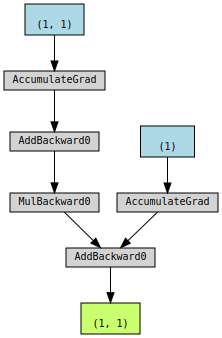

In [ ]:
from torchviz import make_dot
make_dot(out)printing


### Disabling gradient traking 

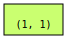

In [ ]:
g2 = make_dot(out.detach())
g2

In [ ]:
data_tsr = z.detach().clone()
copy_tsr = z.clone()
print(" z : " , z )
print("===========================")
print("Copy of z " , copy_tsr)
print("===========================")
print("Detached copy of z " , data_tsr)

 z :  tensor([[23.]], grad_fn=<AddBackward0>)
Copy of z  tensor([[23.]], grad_fn=<CloneBackward0>)
Detached copy of z  tensor([[23.]])


Think about detaching your loss if you want to monitor it during training.  .numpy() would also work but .detach() has the big advantage of not moving the tensor between devices.

### Autograd For Deep Learning

Pytorch provides a link to this very well done [youtube video](https://www.youtube.com/watch?v=tIeHLnjs5U8) by 3Blue1Brown with animations to exlpain backpropagation. 

#### Reminder

Example from Pytorch autograd [tutorial](https://pytorch.org/tutorials/beginner/blitz/autograd_tutorial.html)

In [ ]:
a = torch.tensor([2., 3.], requires_grad=True)
b = torch.tensor([6., 4.], requires_grad=True)

Your computation is $ Q = 3*a^3 -b^2$ \

In [ ]:
Q = 3*a**3 - b**2

In [ ]:
external_grad = torch.tensor([1., 1.])
Q.backward(gradient=external_grad) # equivalent to Q.sum().backward()

We have :    
$\frac{\partial Q}{\partial a} = 9 * a^2$ \
and \
$\frac{\partial Q}{\partial a} = -2 * b$ 


In [ ]:
print(9*a**2 == a.grad)
print(-2*b == b.grad)

tensor([True, True])
tensor([True, True])


In [ ]:
print(a.grad)
print(b.grad)

tensor([36., 81.])
tensor([-12.,  -8.])


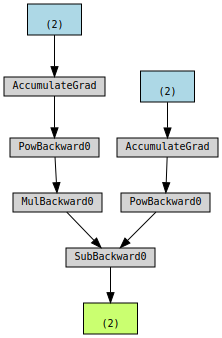

In [ ]:
make_dot(Q)

#### Linear Layer

In a [linear](https://pytorch.org/docs/stable/generated/torch.nn.Linear.html) layer, we have $Y = f(u) = f(A * W + B)$. \
We want to update the weights and bias some we want to compute their gradients.
$\frac{\partial Y}{\partial W} $ and $\frac{\partial Y}{\partial B} $ \
$\frac{\partial Y}{\partial W} =  \frac{\partial Y}{\partial u} * \frac{\partial u}{\partial W}$


In [ ]:
lin_layer = torch.nn.Linear(1,1) # size of input is 1 as well as size of output 
print("This is the weight matrix of my Linear layer : \n", lin_layer.weight)
print("===========================")
print("This is the bias of my Linear layer : \n", lin_layer.bias)


This is the weight matrix of my Linear layer : 
 Parameter containing:
tensor([[0.9998]], requires_grad=True)
This is the bias of my Linear layer : 
 Parameter containing:
tensor([-0.8596], requires_grad=True)


In [ ]:
lin_layer.weight.data = torch.tensor([[0.5]], dtype= torch.float32)
lin_layer.bias.data = torch.tensor([0.25], dtype= torch.float32)
print("This is the weight matrix of my Linear layer : \n", lin_layer.weight)
print("===========================")
print("This is the bias of my Linear layer : \n", lin_layer.bias)
A = torch.tensor([0.3], dtype=torch.float32) 
A

This is the weight matrix of my Linear layer : 
 Parameter containing:
tensor([[0.5000]], requires_grad=True)
This is the bias of my Linear layer : 
 Parameter containing:
tensor([0.2500], requires_grad=True)


tensor([0.3000])

Let's pick a [tanh](https://pytorch.org/docs/stable/generated/torch.nn.Tanh.html#tanh) activation function.

In [ ]:
y1 = lin_layer(A)
my_activation = torch.nn.Tanh()
Y = my_activation(y1)
Y

tensor([0.3799], grad_fn=<TanhBackward0>)

In [ ]:
print("Before Backward propagation")
print("Gradients of the weights of the conv layer :", lin_layer.weight.grad)
print("Gradient of the bias of the conv layer :", lin_layer.bias.grad)

Before Backward propagation
Gradients of the weights of the conv layer : None
Gradient of the bias of the conv layer : None


In [ ]:
Y.backward()

In [ ]:
print("Gradients of the weights of the conv layer :", lin_layer.weight.grad)
print("Gradient of the bias of the conv layer :", lin_layer.bias.grad)

Gradients of the weights of the conv layer : tensor([[0.2567]])
Gradient of the bias of the conv layer : tensor([0.8556])


This results could have been recomputed [manually](https://socratic.org/questions/what-is-the-derivative-of-tanh-x) :
\
My fucntion is $Y = f(u) = f(A * W + B) = tanh(A * W + B)$ \
 $\frac{\partial Y}{\partial W} =  \frac{\partial Y}{\partial u} * \frac{\partial u}{\partial W}$ = $ f'(u) *u' = f'(A*W +B) *A $ where \
$tanh'(x) = 1 - \frac{(e^x - e^{-x})^2}{(e^x + e^{-x})^2}$ \
 but here this is the most basic case with only one dimension and one layer!

In [ ]:
manual_gradients_W = A *(1 -  (torch.exp(y1.detach()) - torch.exp(-y1.detach())).pow(2)/(torch.exp(y1.detach()) + torch.exp(-y1.detach())).pow(2) )
manual_gradients_B = (1 -  (torch.exp(y1.detach()) - torch.exp(-y1.detach())).pow(2)/(torch.exp(y1.detach()) + torch.exp(-y1.detach())).pow(2) )
print(manual_gradients_W)
print(manual_gradients_B)

tensor([0.2567])
tensor([0.8556])


#### Connected layers

Let's compose with two layers and [Sigmoid](https://pytorch.org/docs/stable/generated/torch.nn.Sigmoid.html?highlight=sigmoid#torch.nn.Sigmoid) activation function.  
We have $Y = f(u) = f_2(A_2 * W_2 + B_2) = f_2(f_1(A_1 * W_1 +B_1) *W_2 +B_2)$ 
\
where $f_1$ and $ f_2$ are equal to $\sigma (x) = \frac{1}{1+e^{-x}}$

Gradients of the weights of the first linear layer : tensor([[0.0069]])
Gradient of the bias of the first linear layer : tensor([0.0229])
Gradients of the weights of the second linear layer : tensor([[0.1427]])
Gradient of the bias of the second linear layer : tensor([0.2383])


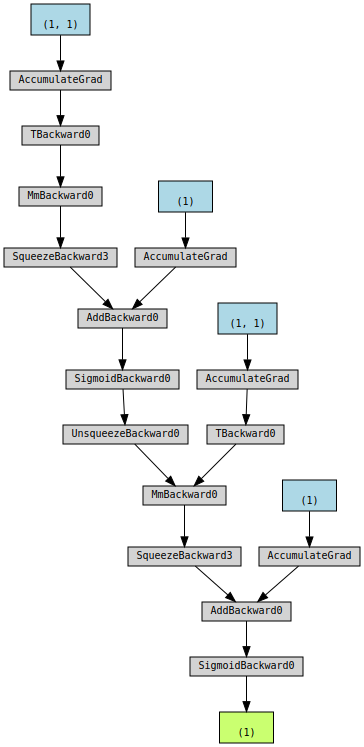

In [ ]:
lin_layer1 = torch.nn.Linear(1,1)
lin_layer1.weight.data = torch.tensor([[0.5]], dtype= torch.float32)
lin_layer1.bias.data = torch.tensor([0.25], dtype= torch.float32)
lin_layer2 = torch.nn.Linear(1,1)
lin_layer2.weight.data = torch.tensor([[0.4]], dtype= torch.float32)
lin_layer2.bias.data = torch.tensor([0.2], dtype= torch.float32)

act1 = torch.nn.Sigmoid()
act2 = torch.nn.Sigmoid()

y1 = lin_layer1(A)
out1 = act1(y1)
y2 = lin_layer2(out1)
Y = act2(y2)
Y.backward()

print("Gradients of the weights of the first linear layer :", lin_layer1.weight.grad)
print("Gradient of the bias of the first linear layer :", lin_layer1.bias.grad)
print("Gradients of the weights of the second linear layer :", lin_layer2.weight.grad)
print("Gradient of the bias of the second linear layer :", lin_layer2.bias.grad)
make_dot(Y)

The [derivative](https://towardsdatascience.com/derivative-of-the-sigmoid-function-536880cf918e) of sigmoid is $\sigma '(x) = \sigma(x)(1- \sigma(x)) $.
Using the chain rule we have $ Y = f_2(j) = f_2(f_1(A)) $ , for the first weight matrix/scalar :     \ $ \frac{\partial Y}{\partial W_1} = f_2'((f_1(A_1 * W_1 +B_1) *W_2 +B_2)) * ((f_1(A_1 * W_1 +B_1) *W_2 +B_2))' = f_2'((f_1(A_1 * W_1 +B_1) *W_2 +B_2)) * (f_1(A_1 * W_1 +B_1)) *W_2 = f_2'((f_1(A_1 * W_1 +B_1) *W_2 +B_2)) * f_1'(A_1 * W_1 +B_1) * A_1 *W_2$
for the first bias :    \
 $ \frac{\partial Y}{\partial B_1} = f_2'((f_1(A_1 * W_1 +B_1) *W_2 +B_2)) * ((f_1(A_1 * W_1 +B_1) *W_2 +B_2))' = f_2'((f_1(A_1 * W_1 +B_1) *W_2 +B_2)) * (f_1(A_1 * W_1 +B_1)) *W_2 = f_2'((f_1(A_1 * W_1 +B_1) *W_2 +B_2)) * f_1'(A_1 * W_1 +B_1) * 1 *W_2$  \

 For the second weight matrix/sacalar :    \
  $ \frac{\partial Y}{\partial W_2} = f_2'((f_1(A_1 * W_1 +B_1) *W_2 +B_2)) * ((f_1(A_1 * W_1 +B_1) *W_2 +B_2))' = f_2'((f_1(A_1 * W_1 +B_1) *W_2 +B_2)) * (f_1(A_1 * W_1 +B_1)) $
\
 For the second bias  :    \
  $ \frac{\partial Y}{\partial B_2} = f_2'((f_1(A_1 * W_1 +B_1) *W_2 +B_2)) * ((f_1(A_1 * W_1 +B_1) *W_2 +B_2))' = f_2'((f_1(A_1 * W_1 +B_1) *W_2 +B_2)) * 1 $





In [ ]:
def derivative_sig(x):
  sig = torch.nn.Sigmoid()
  return sig(x) * (1-sig(x))
print("First weight gradient manually computed : ",derivative_sig(y2.detach()) * derivative_sig(y1.detach()) * lin_layer2.weight.data * A)
print("First bias gradient manually computed : ",derivative_sig(y2.detach()) * derivative_sig(y1.detach()) * lin_layer2.weight.data )
print("Second weight gradient manually computed : ",derivative_sig(y2.detach()) * out1.detach() )
print("Second bias gradient manually computed : ",derivative_sig(y2.detach())  )

First weight gradient manually computed :  tensor([[0.0069]])
First bias gradient manually computed :  tensor([[0.0229]])
Second weight gradient manually computed :  tensor([0.1427])
Second bias gradient manually computed :  tensor([0.2383])


Exercise : Do the same thing with a Convolutional layer? 

Typical training loop for a NN from Pytorch classifier [tutorial](https://pytorch.org/tutorials/beginner/blitz/cifar10_tutorial.html):

```
for epoch in range(2):  # loop over the dataset multiple times

    for i, data in enumerate(trainloader, 0): # loop over the samples in the dataset 

        inputs, ground_truth = data
        
        # zero the parameter gradients
        optimizer.zero_grad()

        # forward + backward + optimize
        outputs = net(inputs)
        loss = criterion(outputs, ground_truth)
        loss.backward()
        optimizer.step()
```



##Other resources

#### Fine tuning

Commonly used when you want to finetune a model. 

In [ ]:
import torchvision

model = torchvision.models.resnet18(pretrained=True)

for param in model.parameters():
    param.requires_grad = False

Downloading: "https://download.pytorch.org/models/resnet18-f37072fd.pth" to /root/.cache/torch/hub/checkpoints/resnet18-f37072fd.pth


  0%|          | 0.00/44.7M [00:00<?, ?B/s]

In [ ]:
for param in model.parameters():
  print(type(param))
  break

<class 'torch.nn.parameter.Parameter'>


### Accumulating the gradients 

As explained in the Pytorch backward [documentation](https://pytorch.org/docs/stable/generated/torch.autograd.backward.html?highlight=backward#torch.autograd.backward), we can also keep the gradients or zero them depending on our objective.

In [ ]:
diag = torch.eye(3, requires_grad=True)
print("diag : \n", diag)
print("===========================")
out = (diag+1).pow(2)
out.sum().backward( retain_graph=True) 
print("First backward pass ")
print("Gradients : \n" ,diag.grad)
print("===========================")
out.sum().backward( retain_graph=True)
print("Second backward pass ")
print("Gradients : \n" ,diag.grad)
print("===========================")
diag.grad.zero_()
out.sum().backward( retain_graph=True)
print("Backward pass done after zeroing the gradients ")
print("Gradients : \n" ,diag.grad)

diag : 
 tensor([[1., 0., 0.],
        [0., 1., 0.],
        [0., 0., 1.]], requires_grad=True)
First backward pass 
Gradients : 
 tensor([[4., 2., 2.],
        [2., 4., 2.],
        [2., 2., 4.]])
Second backward pass 
Gradients : 
 tensor([[8., 4., 4.],
        [4., 8., 4.],
        [4., 4., 8.]])
Backward pass done after zeroing the gradients 
Gradients : 
 tensor([[4., 2., 2.],
        [2., 4., 2.],
        [2., 2., 4.]])


In [ ]:
diag = torch.eye(3, requires_grad=True)
print("diag : \n", diag)
print("===========================")
out = (diag+1).pow(2)
out.sum().backward( ) 
print("First backward pass")
print("Gradients :  \n" ,diag.grad)
print("===========================")
out = (diag+6).pow(2)
out.sum().backward( )
print("Second backward pass")
print("Gradients :  \n" ,diag.grad)


diag : 
 tensor([[1., 0., 0.],
        [0., 1., 0.],
        [0., 0., 1.]], requires_grad=True)
First backward pass
Gradients :  
 tensor([[4., 2., 2.],
        [2., 4., 2.],
        [2., 2., 4.]])
Second backward pass
Gradients :  
 tensor([[18., 14., 14.],
        [14., 18., 14.],
        [14., 14., 18.]])


In [ ]:
diag.grad.zero_()
out = (diag+6).pow(2)
out.sum().backward( )
print("Check on intermediate gradients : \n" ,diag.grad)

Check on intermediate gradients : 
 tensor([[14., 12., 12.],
        [12., 14., 12.],
        [12., 12., 14.]])


Learn more about GPU usage in Pytorch [CUDA Documentation](https://pytorch.org/docs/stable/notes/cuda.html)
and on this incredibly useful NVIDIA best practices [youtube video](https://www.youtube.com/watch?v=9mS1fIYj1So)

Other resources : 



*   Rewritting auto grad function by [extending](https://pytorch.org/docs/stable/notes/extending.html#extending-autograd) autograd class.
*   Autograd with [complex](https://pytorch.org/docs/stable/notes/autograd.html#complex-autograd-doc) numbers.
*   Learn more about GPU usage in Pytorch [CUDA Documentation](https://pytorch.org/docs/stable/notes/cuda.html) and on this incredibly useful NVIDIA best practices [youtube video](https://www.youtube.com/watch?v=9mS1fIYj1So)

In general, the Pytorch [documentation](https://pytorch.org/docs/stable/index.html) is incredibly rich. Please search what you need in it and if you don't find what you are looking for, Pytorch [forum](https://discuss.pytorch.org/) is also very useful. Make sure you are using the latest version of Pytorch to match with the documentation.

If you have some time left, introduce Dataloader class
